In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def minf(V, bm, cm):
    return 0.5 * (1 + np.tanh((V - bm) / cm))

def winf(V, bw, cw):
    return 0.5 * (1 + np.tanh((V - bw) / cw))

def tauw(V, bw, cw):
    return 1 / np.cosh((V - bw) / (2 * cw))

def hodgkinHuxley(t, x, p):
    # Unpack parameters
    C, gfast, gslow, gleak, ENa, EK, Eleak, bm, cm, bw, cw, phiw, Istim = p
    
    # State variables
    V= x[0]
    w = x[1]
    
    # Compute derivatives
    dVdt = (Istim - gfast * minf(V, bm, cm) * (V - ENa) - gslow * w * (V - EK) - gleak * (V - Eleak)) / C
    dwdt = phiw * (winf(V, bw, cw) - w) / tauw(V, bw, cw)
    
    return np.array([dVdt, dwdt])


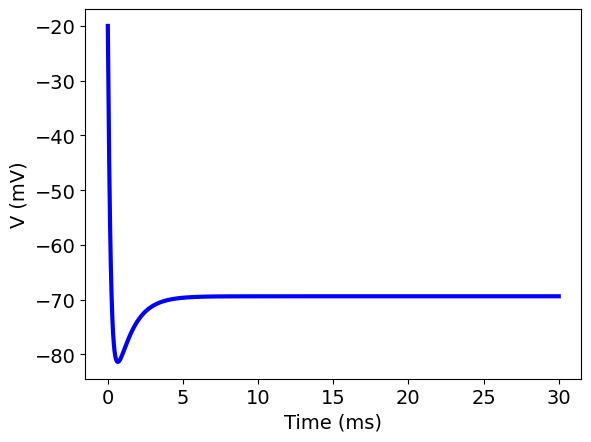

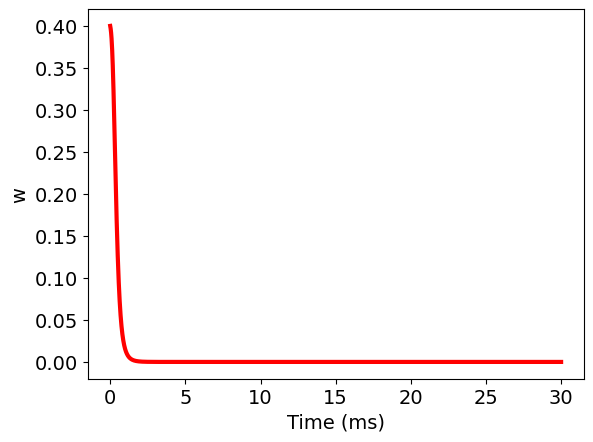

In [126]:
par = np.array([
    2,      # C
    20,     # gfast
    20,     # gslow
    2,      # gleak
    50,     # ENa
    -100,   # EK
    -70,    # Eleak
    -1.2,   # bm
    18,     # cm
    0,     # bw
    10,     # cw
    0.15,   # phiw
    0      # Istim
])
# Initial conditions
x0 = np.array([-20,0.4])
t0,tfin=0,30
delta_max=1e-2
# Solve the system using solve_ivp
solution = solve_ivp(
    hodgkinHuxley,                  # Function to integrate
    (t0, tfin),                     # Time interval (start, end)
    x0,                             # Initial conditions
    args=(par,),                       # Additional parameters to pass to hodgkinHuxley function
    max_step=1e-2,                  # Maximum step size
    dense_output=True               # Get continuous solution
)

# Extract solution
t_values = solution.t
V_values, w_values = solution.y
plt.plot(t_values,V_values,'b')
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)')
plt.show()
plt.plot(t_values,w_values,'r')
plt.xlabel('Time (ms)')
plt.ylabel('w')
plt.show()

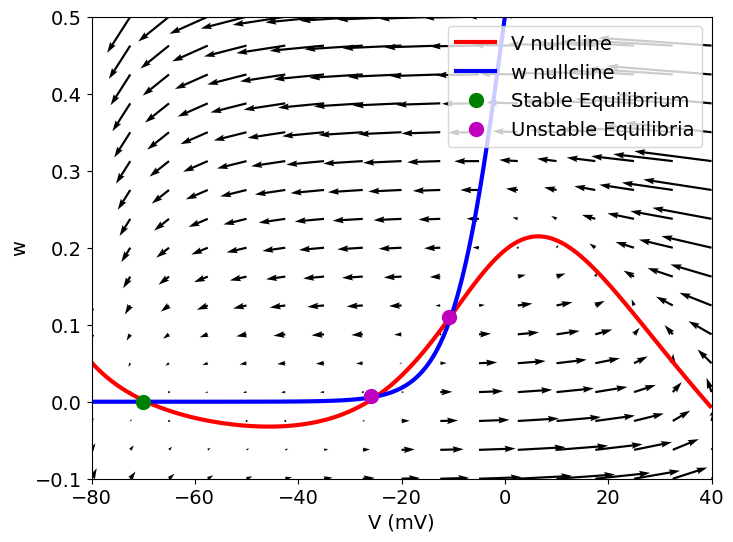

In [96]:
import numpy as np
import matplotlib.pyplot as plt
xx, yy = np.meshgrid(np.linspace(-80, 40, 200), np.linspace(-0.1, 0.5, 200))
coords = np.c_[xx.ravel(), yy.ravel()]
xxPlane, yyPlane = np.meshgrid(np.linspace(-80, 40, 17), np.linspace(-0.1, 0.5, 17))
coordsPlane = np.c_[xxPlane.ravel(), yyPlane.ravel()]
plt.rcParams.update({'font.size': 14,'lines.linewidth': 3}) 


def minf(V, bm, cm):
    return 0.5 * (1 + np.tanh((V - bm) / cm))

def winf(V, bw, cw):
    return 0.5 * (1 + np.tanh((V - bw) / cw))

def tauw(V, bw, cw):
    return 1 / np.cosh((V - bw) / (2 * cw))

def hodgkinHuxley(t, x, p):
    # Unpack parameters
    C, gfast, gslow, gleak, ENa, EK, Eleak, bm, cm, bw, cw, phiw, Istim = p
    
    # State variables
    V= x[0]
    w = x[1]
    
    # Compute derivatives
    dVdt = (Istim - gfast * minf(V, bm, cm) * (V - ENa) - gslow * w * (V - EK) - gleak * (V - Eleak)) / C
    dwdt = phiw * (winf(V, bw, cw) - w) / tauw(V, bw, cw)
    
    return np.array([dVdt, dwdt])
par = np.array([
    2,      # C
    20,     # gfast
    20,     # gslow
    2,      # gleak
    50,     # ENa
    -100,   # EK
    -70,    # Eleak
    -1.2,   # bm
    18,     # cm
    0,     # bw
    10,     # cw
    0.15,   # phiw
    0      # Istim
])
ode_rhs = np.array([hodgkinHuxley(0, coord, par) for coord in coords])
ode_rhsPlane = np.array([hodgkinHuxley(0, coord, par) for coord in coordsPlane])

v_dot = ode_rhs[:, 0].reshape(xx.shape)
w_dot = ode_rhs[:, 1].reshape(xx.shape)

v_dotPlane = ode_rhsPlane[:, 0].reshape(xxPlane.shape)
w_dotPlane = ode_rhsPlane[:, 1].reshape(xxPlane.shape)


plt.figure(figsize=(8, 6))
v_contour = plt.contour(xx, yy, v_dot, levels=[0], colors='r')  # Red for V nullcline
w_contour = plt.contour(xx, yy, w_dot, levels=[0], colors='b')
v_handle = plt.Line2D([0], [0], color='r', label='V nullcline')
w_handle = plt.Line2D([0], [0], color='b', label='w nullcline')

# Create handles for the equilibrium points
stable_eq_handle = plt.Line2D([0], [0], marker='o', color='g', label='Stable Equilibrium', markersize=10, linestyle='')
unstable_eq_handle = plt.Line2D([0], [0], marker='o', color='m', label='Unstable Equilibria', markersize=10, linestyle='')
# trajectory = plt.Line2D([0], [0],color = 'y',label = 'Trajectory')
# Create the legend
plt.quiver(xxPlane, yyPlane, v_dotPlane, w_dotPlane, angles='xy', scale_units='xy', scale=30, color='k')
plt.plot(-70, 0, 'go', label='Stable Equilibrium', markersize=10)
plt.plot(-26, 0.007, 'mo', label='Unstable Equilibrium', markersize=10)
plt.plot(-10.9, 0.11, 'mo', label='Unstable Equilibrium', markersize=10)
# plt.plot(V_values,w_values,'y',label = 'Trajectory')
plt.xlabel('V (mV)')
plt.ylabel('w')

# Include all handles in the legend
plt.legend(handles=[v_handle, w_handle, stable_eq_handle, unstable_eq_handle], loc="best")

plt.show()

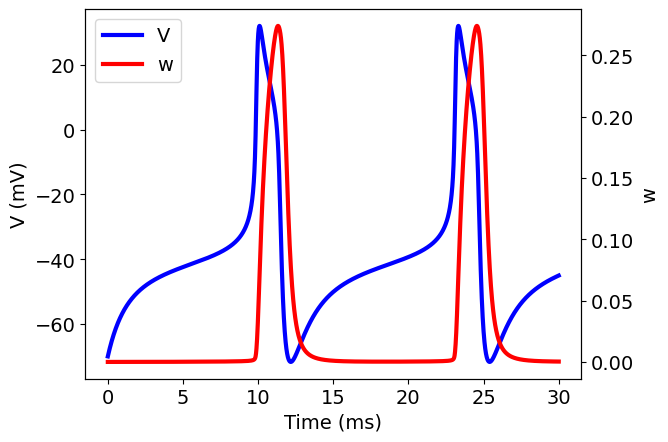

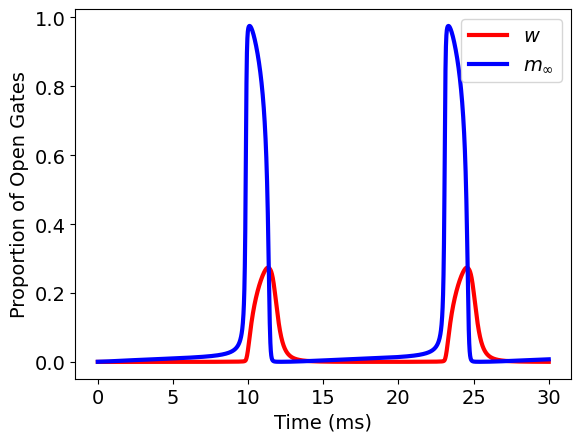

In [174]:
par = np.array([
    2,      # C
    20,     # gfast
    20,     # gslow
    2,      # gleak
    50,     # ENa
    -100,   # EK
    -70,    # Eleak
    -1.2,   # bm
    18,     # cm
    0,     # bw
    10,     # cw
    0.15,   # phiw
    40      # Istim
])
# Initial conditions
x0 = np.array([-70,0])
t0,tfin=0,30
delta_max=1e-2
# Solve the system using solve_ivp
solution = solve_ivp(
    hodgkinHuxley,                  # Function to integrate
    (t0, tfin),                     # Time interval (start, end)
    x0,                             # Initial conditions
    args=(par,),                       # Additional parameters to pass to hodgkinHuxley function
    max_step=1e-2,                  # Maximum step size
    dense_output=True               # Get continuous solution
)

# Extract solution
t_values = solution.t
V_values, w_values = solution.y

fig, ax1 = plt.subplots()

# Plot V_values on the left y-axis
line1, = ax1.plot(t_values, V_values, 'b', label="V")
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('V (mV)')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot w_values on the right y-axis
line2, = ax2.plot(t_values, w_values, 'r', label="w")
ax2.set_ylabel('w')

# Combine the legends from both axes into a single one
lines = [line1, line2]
labels = ['V', 'w']
ax1.legend(lines, labels, loc="upper left")


def m_inf(V, beta_m, gamma_m):
    return 0.5 * (1 + np.tanh((V - beta_m) / gamma_m))
# Show the plot
plt.show()
plt.plot(t_values, w_values,'r', label="$w$")
plt.plot(t_values,m_inf(V_values,-1.2,18),'b', label=r"$m_{\infty}$")
plt.legend()
plt.xlabel("Time (ms)")
plt.ylabel("Proportion of Open Gates")
plt.show()


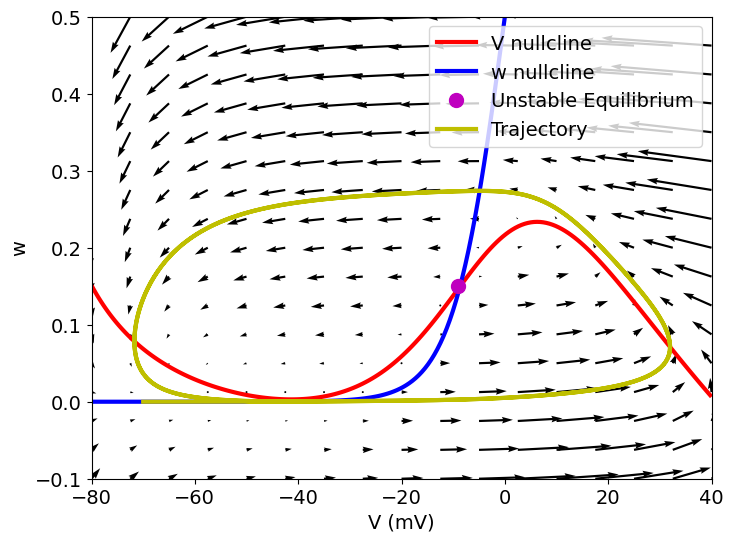

In [154]:
import numpy as np
import matplotlib.pyplot as plt
xx, yy = np.meshgrid(np.linspace(-80, 40, 200), np.linspace(-0.1, 0.5, 200))
coords = np.c_[xx.ravel(), yy.ravel()]
xxPlane, yyPlane = np.meshgrid(np.linspace(-80, 40, 17), np.linspace(-0.1, 0.5, 17))
coordsPlane = np.c_[xxPlane.ravel(), yyPlane.ravel()]
plt.rcParams.update({'font.size': 14,'lines.linewidth': 3}) 


def minf(V, bm, cm):
    return 0.5 * (1 + np.tanh((V - bm) / cm))

def winf(V, bw, cw):
    return 0.5 * (1 + np.tanh((V - bw) / cw))

def tauw(V, bw, cw):
    return 1 / np.cosh((V - bw) / (2 * cw))

def hodgkinHuxley(t, x, p):
    # Unpack parameters
    C, gfast, gslow, gleak, ENa, EK, Eleak, bm, cm, bw, cw, phiw, Istim = p
    
    # State variables
    V= x[0]
    w = x[1]
    
    # Compute derivatives
    dVdt = (Istim - gfast * minf(V, bm, cm) * (V - ENa) - gslow * w * (V - EK) - gleak * (V - Eleak)) / C
    dwdt = phiw * (winf(V, bw, cw) - w) / tauw(V, bw, cw)
    
    return np.array([dVdt, dwdt])
ode_rhs = np.array([hodgkinHuxley(0, coord, par) for coord in coords])
ode_rhsPlane = np.array([hodgkinHuxley(0, coord, par) for coord in coordsPlane])

v_dot = ode_rhs[:, 0].reshape(xx.shape)
w_dot = ode_rhs[:, 1].reshape(xx.shape)

v_dotPlane = ode_rhsPlane[:, 0].reshape(xxPlane.shape)
w_dotPlane = ode_rhsPlane[:, 1].reshape(xxPlane.shape)


plt.figure(figsize=(8, 6))
v_contour = plt.contour(xx, yy, v_dot, levels=[0], colors='r')  # Red for V nullcline
w_contour = plt.contour(xx, yy, w_dot, levels=[0], colors='b')
v_handle = plt.Line2D([0], [0], color='r', label='V nullcline')
w_handle = plt.Line2D([0], [0], color='b', label='w nullcline')

# Create handles for the equilibrium points
unstable_eq_handle = plt.Line2D([0], [0], marker='o', color='m', label='Unstable Equilibrium', markersize=10, linestyle='')
trajectory = plt.Line2D([0], [0],color = 'y',label = 'Trajectory')
# Create the legend
plt.quiver(xxPlane, yyPlane, v_dotPlane, w_dotPlane, angles='xy', scale_units='xy', scale=30, color='k')
plt.plot(-9, 0.15, 'mo', label='Unstable Equilibrium', markersize=10)
plt.plot(V_values,w_values,'y',label = 'Trajectory')
plt.xlabel('V (mV)')
plt.ylabel('w')

# Include all handles in the legend
plt.legend(handles=[v_handle, w_handle, unstable_eq_handle, trajectory], loc="best")

plt.show()

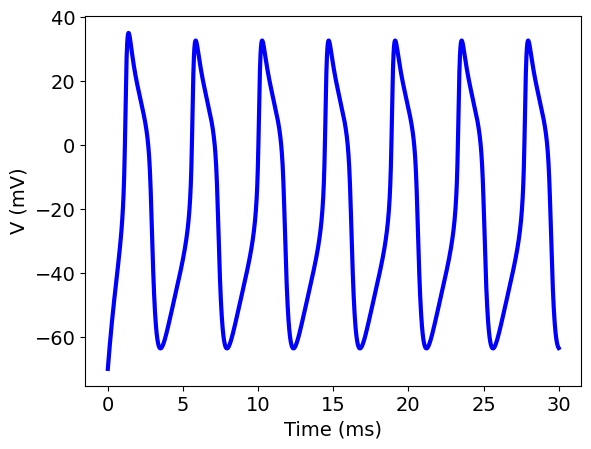

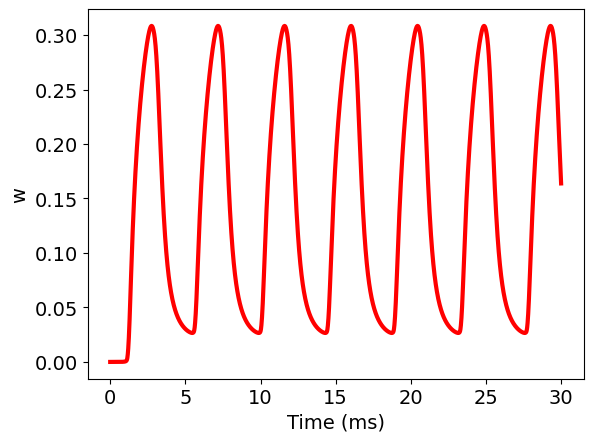

In [155]:
par = np.array([
    2,      # C
    20,     # gfast
    20,     # gslow
    2,      # gleak
    50,     # ENa
    -100,   # EK
    -70,    # Eleak
    -1.2,   # bm
    18,     # cm
    0,     # bw
    10,     # cw
    0.15,   # phiw
    120      # Istim
])
# Initial conditions
x0 = np.array([-70,0])
t0,tfin=0,30
delta_max=1e-2
# Solve the system using solve_ivp
solution = solve_ivp(
    hodgkinHuxley,                  # Function to integrate
    (t0, tfin),                     # Time interval (start, end)
    x0,                             # Initial conditions
    args=(par,),                       # Additional parameters to pass to hodgkinHuxley function
    max_step=1e-2,                  # Maximum step size
    dense_output=True               # Get continuous solution
)

# Extract solution
t_values = solution.t
V_values, w_values = solution.y
plt.plot(t_values,V_values,'b')
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)')
plt.show()
plt.plot(t_values,w_values,'r')
plt.xlabel('Time (ms)')
plt.ylabel('w')
plt.show()


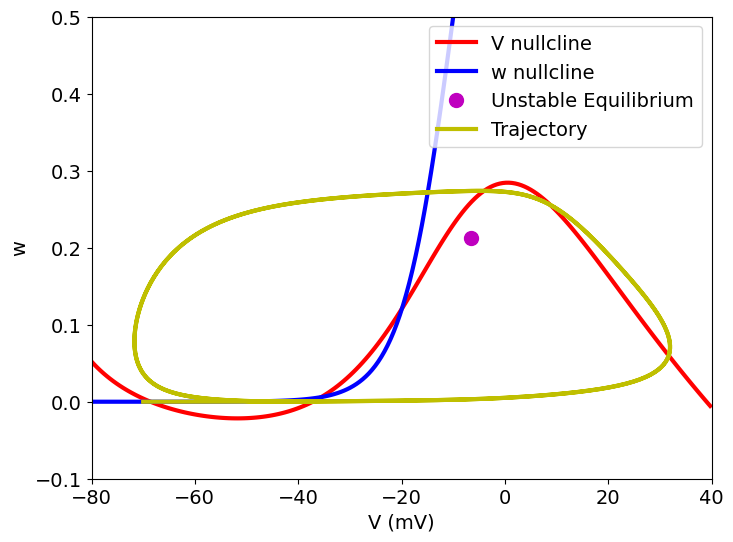

In [179]:
import numpy as np
import matplotlib.pyplot as plt
xx, yy = np.meshgrid(np.linspace(-80, 40, 200), np.linspace(-0.1, 0.5, 200))
coords = np.c_[xx.ravel(), yy.ravel()]
xxPlane, yyPlane = np.meshgrid(np.linspace(-80, 40, 17), np.linspace(-0.1, 0.5, 17))
coordsPlane = np.c_[xxPlane.ravel(), yyPlane.ravel()]
plt.rcParams.update({'font.size': 14,'lines.linewidth': 3}) 


def minf(V, bm, cm):
    return 0.5 * (1 + np.tanh((V - bm) / cm))

def winf(V, bw, cw):
    return 0.5 * (1 + np.tanh((V - bw) / cw))

def tauw(V, bw, cw):
    return 1 / np.cosh((V - bw) / (2 * cw))

def hodgkinHuxley(t, x, p):
    # Unpack parameters
    C, gfast, gslow, gleak, ENa, EK, Eleak, bm, cm, bw, cw, phiw, Istim = p
    
    # State variables
    V= x[0]
    w = x[1]
    
    # Compute derivatives
    dVdt = (Istim - gfast * minf(V, bm, cm) * (V - ENa) - gslow * w * (V - EK) - gleak * (V - Eleak)) / C
    dwdt = phiw * (winf(V, bw, cw) - w) / tauw(V, bw, cw)
    
    return np.array([dVdt, dwdt])
ode_rhs = np.array([hodgkinHuxley(0, coord, par) for coord in coords])
ode_rhsPlane = np.array([hodgkinHuxley(0, coord, par) for coord in coordsPlane])

v_dot = ode_rhs[:, 0].reshape(xx.shape)
w_dot = ode_rhs[:, 1].reshape(xx.shape)

v_dotPlane = ode_rhsPlane[:, 0].reshape(xxPlane.shape)
w_dotPlane = ode_rhsPlane[:, 1].reshape(xxPlane.shape)


plt.figure(figsize=(8, 6))
v_contour = plt.contour(xx, yy, v_dot, levels=[0], colors='r')  # Red for V nullcline
w_contour = plt.contour(xx, yy, w_dot, levels=[0], colors='b')
v_handle = plt.Line2D([0], [0], color='r', label='V nullcline')
w_handle = plt.Line2D([0], [0], color='b', label='w nullcline')

# Create handles for the equilibrium points
unstable_eq_handle = plt.Line2D([0], [0], marker='o', color='m', label='Unstable Equilibrium', markersize=10, linestyle='')
trajectory = plt.Line2D([0], [0],color = 'y',label = 'Trajectory')
# Create the legend
# plt.quiver(xxPlane, yyPlane, v_dotPlane, w_dotPlane, angles='xy', scale_units='xy', scale=30, color='k')
plt.plot(-6.6, 0.212, 'mo', label='Unstable Equilibrium', markersize=10)
plt.plot(V_values,w_values,'y',label = 'Trajectory')
plt.xlabel('V (mV)')
plt.ylabel('w')

# Include all handles in the legend
plt.legend(handles=[v_handle, w_handle, unstable_eq_handle, trajectory], loc="best")

plt.show()

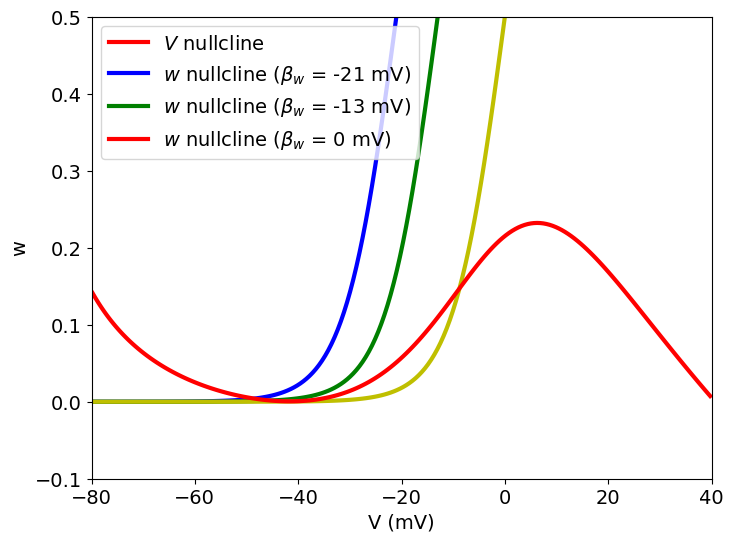

In [185]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameter array
par = np.array([
    2,      # C
    20,     # gfast
    20,     # gslow
    2,      # gleak
    50,     # ENa
    -100,   # EK
    -70,    # Eleak
    -1.2,   # bm
    18,     # cm
    -21,    # bw (will be updated)
    10,     # cw
    0.15,   # phiw
    37       # Istim
])

# Define the meshgrid for V and w
xx, yy = np.meshgrid(np.linspace(-80, 40, 200), np.linspace(-0.1, 0.5, 200))
coords = np.c_[xx.ravel(), yy.ravel()]
xxPlane, yyPlane = np.meshgrid(np.linspace(-80, 40, 17), np.linspace(-0.1, 0.5, 17))
coordsPlane = np.c_[xxPlane.ravel(), yyPlane.ravel()]
plt.rcParams.update({'font.size': 14, 'lines.linewidth': 3})

# Define the functions
def minf(V, bm, cm):
    return 0.5 * (1 + np.tanh((V - bm) / cm))

def winf(V, bw, cw):
    return 0.5 * (1 + np.tanh((V - bw) / cw))

def tauw(V, bw, cw):
    return 1 / np.cosh((V - bw) / (2 * cw))

def hodgkinHuxley(t, x, p):
    # Unpack parameters
    C, gfast, gslow, gleak, ENa, EK, Eleak, bm, cm, bw, cw, phiw, Istim = p
    
    # State variables
    V = x[0]
    w = x[1]
    
    # Compute derivatives
    dVdt = (Istim - gfast * minf(V, bm, cm) * (V - ENa) - gslow * w * (V - EK) - gleak * (V - Eleak)) / C
    dwdt = phiw * (winf(V, bw, cw) - w) / tauw(V, bw, cw)
    
    return np.array([dVdt, dwdt])

# Define the different values of bw
bw_values = [-21, -13, 0]  # Three different values of bw

# Create the plot
plt.figure(figsize=(8, 6))
w_handles = []
# Loop over the different values of bw
for bw in bw_values:

    # Update the bw value in the parameter array
    par[9] = bw
    
    # Compute the nullclines
    ode_rhs = np.array([hodgkinHuxley(0, coord, par) for coord in coords])
    v_dot = ode_rhs[:, 0].reshape(xx.shape)
    w_dot = ode_rhs[:, 1].reshape(xx.shape)
    
    # Plot the w nullcline
    w_contour = plt.contour(xx, yy, w_dot, levels=[0], colors=['b', 'g', 'y'][bw_values.index(bw)], linestyles=['-', '-', '-'][bw_values.index(bw)])
    w_handles.append(plt.Line2D([0], [0], color=['b', 'g', 'r'][bw_values.index(bw)], linestyle=['-', '-', '-'][bw_values.index(bw)], label=rf'$w$ nullcline ($\beta_w$ = {bw} mV)'))

# Plot the V nullcline (only once since it doesn't depend on bw)
ode_rhs = np.array([hodgkinHuxley(0, coord, par) for coord in coords])
v_dot = ode_rhs[:, 0].reshape(xx.shape)
v_contour = plt.contour(xx, yy, v_dot, levels=[0], colors='r')
v_handle = plt.Line2D([0], [0], color='r', label=r'$V$ nullcline')
# stable_eq_handle = plt.Line2D([0], [0], marker='o', color='g', label='Stable Equilibrium', markersize=10, linestyle='')
# unstable_eq_handle = plt.Line2D([0], [0], marker='o', color='m', label='Unstable Equilibria', markersize=10, linestyle='')

# Add quiver plot for vector field
ode_rhsPlane = np.array([hodgkinHuxley(0, coord, par) for coord in coordsPlane])
v_dotPlane = ode_rhsPlane[:, 0].reshape(xxPlane.shape)
w_dotPlane = ode_rhsPlane[:, 1].reshape(xxPlane.shape)
# plt.quiver(xxPlane, yyPlane, v_dotPlane, w_dotPlane, angles='xy', scale_units='xy', scale=30, color='k')

# Add equilibrium points and labels
# plt.plot(-26, 0.007, 'mo', label='Unstable Equilibrium', markersize=10)
# plt.plot(-10.9, 0.11, 'mo', label='Unstable Equilibrium', markersize=10)
# plt.plot(-70, 0, 'go', label='Stable Equilibrium', markersize=10)

plt.xlabel('V (mV)')
plt.ylabel('w')

# Add legend
plt.legend(handles=[v_handle, w_handles[0], w_handles[1], w_handles[2]], loc="upper left")

plt.show()

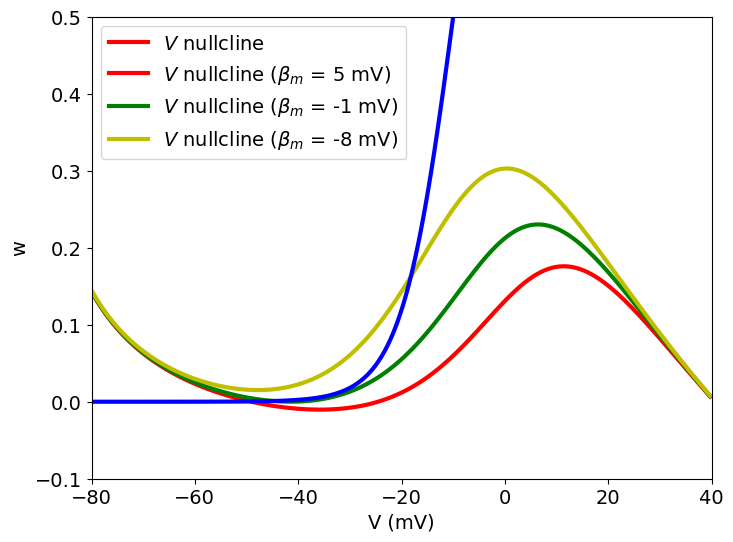

In [187]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameter array
par = np.array([
    2,      # C
    20,     # gfast
    20,     # gslow
    2,      # gleak
    50,     # ENa
    -100,   # EK
    -70,    # Eleak
    -1.2,   # bm
    18,     # cm
    -10,    # bw (will be updated)
    10,     # cw
    0.15,   # phiw
    37       # Istim
])

# Define the meshgrid for V and w
xx, yy = np.meshgrid(np.linspace(-80, 40, 200), np.linspace(-0.1, 0.5, 200))
coords = np.c_[xx.ravel(), yy.ravel()]
xxPlane, yyPlane = np.meshgrid(np.linspace(-80, 40, 17), np.linspace(-0.1, 0.5, 17))
coordsPlane = np.c_[xxPlane.ravel(), yyPlane.ravel()]
plt.rcParams.update({'font.size': 14, 'lines.linewidth': 3})

# Define the functions
def minf(V, bm, cm):
    return 0.5 * (1 + np.tanh((V - bm) / cm))

def winf(V, bw, cw):
    return 0.5 * (1 + np.tanh((V - bw) / cw))

def tauw(V, bw, cw):
    return 1 / np.cosh((V - bw) / (2 * cw))

def hodgkinHuxley(t, x, p):
    # Unpack parameters
    C, gfast, gslow, gleak, ENa, EK, Eleak, bm, cm, bw, cw, phiw, Istim = p
    
    # State variables
    V = x[0]
    w = x[1]
    
    # Compute derivatives
    dVdt = (Istim - gfast * minf(V, bm, cm) * (V - ENa) - gslow * w * (V - EK) - gleak * (V - Eleak)) / C
    dwdt = phiw * (winf(V, bw, cw) - w) / tauw(V, bw, cw)
    
    return np.array([dVdt, dwdt])

# Define the different values of bw
bw_values = [5, -1, -8]  # Three different values of bw

# Create the plot
plt.figure(figsize=(8, 6))
v_handles = []
# Loop over the different values of bw
for bw in bw_values:

    # Update the bw value in the parameter array
    par[7] = bw
    
    # Compute the nullclines
    ode_rhs = np.array([hodgkinHuxley(0, coord, par) for coord in coords])
    v_dot = ode_rhs[:, 0].reshape(xx.shape)
    w_dot = ode_rhs[:, 1].reshape(xx.shape)
    
    # Plot the w nullcline
    v_contour = plt.contour(xx, yy, v_dot, levels=[0], colors=['r', 'g', 'y'][bw_values.index(bw)], linestyles=['-', '-', '-'][bw_values.index(bw)])
    v_handles.append(plt.Line2D([0], [0], color=['r', 'g', 'y'][bw_values.index(bw)], linestyle=['-', '-', '-'][bw_values.index(bw)], label=rf'$V$ nullcline ($\beta_m$ = {bw} mV)'))

# Plot the V nullcline (only once since it doesn't depend on bw)
ode_rhs = np.array([hodgkinHuxley(0, coord, par) for coord in coords])
v_dot = ode_rhs[:, 0].reshape(xx.shape)
w_contour = plt.contour(xx, yy, w_dot, levels=[0], colors='b')
w_handle = plt.Line2D([0], [0], color='r', label=r'$w$ nullcline')
# stable_eq_handle = plt.Line2D([0], [0], marker='o', color='g', label='Stable Equilibrium', markersize=10, linestyle='')
# unstable_eq_handle = plt.Line2D([0], [0], marker='o', color='m', label='Unstable Equilibria', markersize=10, linestyle='')

# Add quiver plot for vector field
ode_rhsPlane = np.array([hodgkinHuxley(0, coord, par) for coord in coordsPlane])
v_dotPlane = ode_rhsPlane[:, 0].reshape(xxPlane.shape)
w_dotPlane = ode_rhsPlane[:, 1].reshape(xxPlane.shape)
# plt.quiver(xxPlane, yyPlane, v_dotPlane, w_dotPlane, angles='xy', scale_units='xy', scale=30, color='k')

# Add equilibrium points and labels
# plt.plot(-35, 0.007, 'mo', label='Unstable Equilibrium', markersize=10)
# plt.plot(-20.5, 0.11, 'mo', label='Unstable Equilibrium', markersize=10)
# plt.plot(-70, 0, 'go', label='Stable Equilibrium', markersize=10)

plt.xlabel('V (mV)')
plt.ylabel('w')

# Add legend
plt.legend(handles=[v_handle, v_handles[0], v_handles[1], v_handles[2]], loc="upper left")

plt.show()